In [78]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [79]:
def bruitage(img, nombre_pixel_bruite):

    result = img.copy() # On prend une copie sinon on modifie aussi l'originale
    mapping = lambda a: 255 if a > 0.5 else 0 #Fonction lambda pour le bruitage

    for _ in range(nombre_pixel_bruite):
        x = np.random.randint(0,img.shape[0] - 1)
        y = np.random.randint(0,img.shape[1] - 1)
        result[x,y] = mapping(np.random.rand())

    return result

def filtrage_median(img, pattern_size=5):
    
    result = img.copy()

    for i in range(0, result.shape[0]):
        for j in range(0, result.shape[1]):
            zone = sorted(list(np.reshape(img[i:i + pattern_size, j:j + pattern_size], -1)))
            median_value = zone[len(zone)//2]
            result[i,j] = median_value

    return result

def eqm(im1: np.ndarray, im2: np.ndarray):
    return np.mean((im1 - im2) ** 2)

def floutage(img, ksize=5):
    return cv.blur(img.copy(), ksize=(ksize,ksize))

In [80]:
img = plt.imread("image.png")[:,:,0]

eqm =  1316.5482


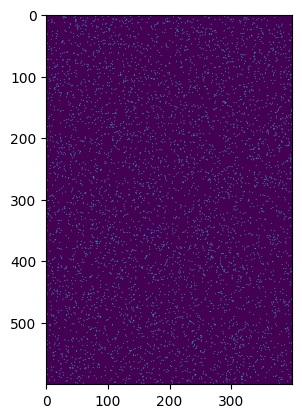

In [81]:
# Bruitage
img_bruitee = bruitage(img, nombre_pixel_bruite = 10_000)
print("eqm = ", eqm(img, img_bruitee))
plt.imshow(img_bruitee)

eqm =  0.01583481


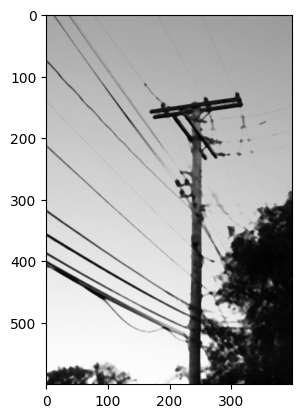

In [82]:
# Filtre Median
img_median = filtrage_median(img, 5)
print("eqm = ", eqm(img, img_median))
plt.imshow(img_median, cmap="gray")

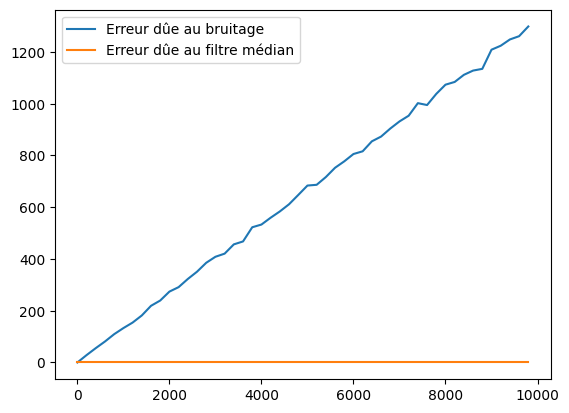

In [83]:
# Erreur quadratique moyenne
N = 10_000

eqm_1, eqm_2 = [], []
n_list = range(0, N, N//50)
for n in n_list:
    im_bruitee = bruitage(img, n)
    im_filtree = filtrage_median(im_bruitee)

    eqm_1.append(eqm(img, im_bruitee))
    eqm_2.append(eqm(img, im_filtree))

plt.plot(n_list, eqm_1, label="Erreur dûe au bruitage")
plt.plot(n_list, eqm_2, label="Erreur dûe au filtre médian")
plt.legend()
plt.show()

/home/noe/miniconda3/envs/TP_Image/lib/python3.10/site-packages/matplotlib/_api/__init__.py:127: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val not in values:


ValueError: array([[0.627451  , 0.62352943, 0.62352943, ..., 0.5803922 , 0.5803922 ,
        0.5764706 ],
       [0.627451  , 0.62352943, 0.62352943, ..., 0.5803922 , 0.5803922 ,
        0.5764706 ],
       [0.627451  , 0.627451  , 0.62352943, ..., 0.5803922 , 0.5764706 ,
        0.5764706 ],
       ...,
       [0.9411765 , 0.88235295, 0.56078434, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.9607843 , 0.7294118 , 0.13333334, ..., 0.01960784, 0.02352941,
        0.02352941],
       [0.9490196 , 0.6313726 , 0.30588236, ..., 0.01960784, 0.02745098,
        0.02352941]], dtype=float32) is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

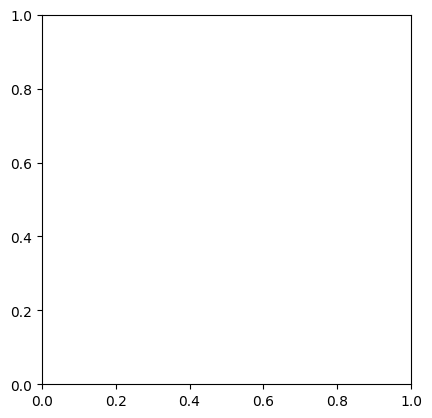

In [84]:
plt.imshow("Image originale", img)
plt.imshow("Image bruitee", img_bruitee)
plt.imshow("Image filtre median", img_median)

ValueError: array([[[160, 160, 160],
        [159, 159, 159],
        [159, 159, 159],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [147, 147, 147]],

       [[160, 160, 160],
        [159, 159, 159],
        [159, 159, 159],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [147, 147, 147]],

       [[160, 160, 160],
        [160, 160, 160],
        [159, 159, 159],
        ...,
        [148, 148, 148],
        [147, 147, 147],
        [147, 147, 147]],

       ...,

       [[240, 240, 240],
        [225, 225, 225],
        [143, 143, 143],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[245, 245, 245],
        [186, 186, 186],
        [ 34,  34,  34],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[242, 242, 242],
        [161, 161, 161],
        [ 78,  78,  78],
        ...,
        [  5,   5,   5],
        [  7,   7,   7],
        [  6,   6,   6]]], dtype=uint8) is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

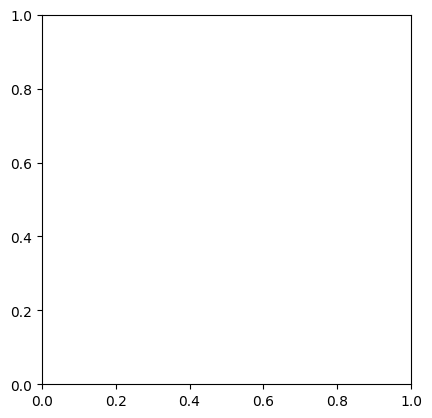

In [86]:
img_originale = plt.imread("image2.png")[:,:,0]

img_floue = floutage(img)

plt.imshow("Image originale", img_originale)
plt.imshow("Image floue", img_floue)